### 函数与泛函编程

In [1]:
(* 前缀、中缀和后缀： *)
f[x]
f@x
f[x, y]
x~f~y
f[g[x]]
f@g[x]
f@g@x
x // g // f

f[x]
f[x]
f[x, y]
f[x, y]
f[g[x]]
f[g[x]]
f[g[x]]
f[g[x]]

函数的属性：

In [10]:
(* Orderless：交换性 *)
SetAttributes[f, Orderless]; 
f[x, y, z] == f[y, z, x]

True

In [13]:
(* Flat：结合性 *)
SetAttributes[f, Flat]; 
f[x, f[y, z]] == f[f[x, y], z] == f[x, y, z]

True

In [16]:
(* OneIdentity:同一性 *)
SetAttributes[f, OneIdentity];
MatchQ[a, f[x_ : 0, y_]]

True

In [19]:
(* Listable *)
SetAttributes[f, Listable]; 
f[{1, 2, 3}]

{f[1], f[2], f[3]}

匿名函数用法

In [22]:
(* 自定义排序函数： *)
listlist = {{1, 3}, {1, 2}, {4, 3}, {5, 1}, {2, 6}, {2, 3}};
Sort[listlist]
Sort[listlist, #1[[2]] <= #2[[2]] &]
Sort[listlist, (#1[[1]] > #2[[
      1]]) || (#1[[1]] == #2[[1]] && #1[[2]] < #2[[2]]) &]

{{1, 2}, {1, 3}, {2, 3}, {2, 6}, {4, 3}, {5, 1}}
{{5, 1}, {1, 2}, {1, 3}, {4, 3}, {2, 3}, {2, 6}}
{{5, 1}, {4, 3}, {2, 3}, {2, 6}, {1, 2}, {1, 3}}

3        5
 -5    5      67     19 x   247 x     89 x
x   - ---- + ----- - ---- + ------ + -------
         3   360 x   3024   604800   4790016
      6 x
 -5    5      67
x   - ---- + -----
         3   360 x
      6 x
 -5    5      67
x   - ---- + -----
         3   360 x
      6 x
 -5    5      67
x   - ---- + -----
         3   360 x
      6 x
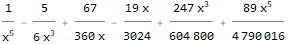
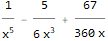
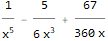
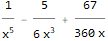

In [27]:
(* 自定义筛选函数： *)
S = Normal@Series[Cos[x]/(x^4 Tan[x]), {x, 0, 5}]
Plus @@ Cases[S, a_. x^d_ /; d < 0]
Select[S, (# /. {a_. x^d_ :> d}) < 0 &]
Select[S, MatchQ[#, a_. x^d_ /; d < 0] &]

In [32]:
(* 带下标的函数： *)
p = Plus @@ ((g @@ #)[u[0]] Times @@ u /@ # & /@ Partitions[#]) &;
p[5]

5 5[u[0]]

In [4]:
(* 函数的函数： *)
f = Function[x, Function[y, x + y]];
f[2]
f[2][2]

Function[y$, 2 + y$]
4

泛函操作：

In [35]:
Map[f, {a, b, c}]
f /@ {a, b, c}

{f[a], f[b], f[c]}
{f[a], f[b], f[c]}

In [37]:
L = {a, b, c, d};
MapIndexed[
 Print["The position of ", #1, " in the List ", L, " is ", First[#2], 
   "."] &, L]

The position of a in the List {a, b, c, d} is 1.
The position of b in the List {a, b, c, d} is 2.
The position of c in the List {a, b, c, d} is 3.
The position of d in the List {a, b, c, d} is 4.


{Null, Null, Null, Null}

In [44]:
MapThread[f, {{a, b, c}, {p, q, r}, {u, v, w}, {x, y, z}}]
f @@@ Transpose[{{a, b, c}, {p, q, r}, {u, v, w}, {x, y, z}}]

ClearAll
{f[a, u, x, Plus @@ ((g @@ #1)[u[0]] Times @@ u /@ #1 & ) /@ Partitions[#1] & ], 
 
>   f[b, q, v, y], f[c, r, w, z]}
{f[a, u, x, Plus @@ ((g @@ #1)[u[0]] Times @@ u /@ #1 & ) /@ Partitions[#1] & ], 
 
>   f[b, q, v, y], f[c, r, w, z]}

In [47]:
Scan[Print["Hey! I'm ", #] &, {a, b, c}]

Hey! I'm a
Hey! I'm b
Hey! I'm c


In [48]:
Apply[f, {a, b, c}]
f @@ {a, b, c}

f[a, b, c]
f[a, b, c]

In [50]:
list = {g[1, 2], h[3, 4], u[x, y]};
f @@ # & /@ list
f @@@ list

{f[1, 2], f[3, 4], f[x, y]}
{f[1, 2], f[3, 4], f[x, y]}

In [53]:
Through[(f + g + h)[x, y]]

f[x, y] + g[x, y] + h[x, y]

函数迭代：

In [54]:
Nest[f, x, 3]
NestList[f, x, 3]
ord[f_] := Max[Cases[f, u[i_] :> i, Infinity]]
dx[f_] := Expand@Sum[D[f, u[i]] u[i + 1], {i, 0, ord[f]}]
dx[f_, n_] := Nest[dx, f, n]

dx[f[u[0]], 4]

f[x]
{x, f[x], f[x], f[x]}
                      2                                           2       (3)
u[4] f'[u[0]] + 3 u[2]  f''[u[0]] + 4 u[1] u[3] f''[u[0]] + 6 u[1]  u[2] f   [u[0]] + 
 
        4  (4)
>   u[1]  f   [u[0]]

1.73205080756887729352744634150587236694280525381038062805580697945193301690880003708114\
 
>   618675724857567562614141540670302996994509499895247881165551209437364852809323190230\
 
>   558206797482010108467492326501531234326690332288665067225466892183797122704713166036\
 
>   786158801904998653737985938946765034750657605075661834812960610094760218719032508314\
 
>   582952395983299778982450828871446383291734722416398458785539766795806381835366611084\
 
>   317378089437831610208830552490167002352071114428869599095636579708716849807289949329\
 
>   648428302078640860398873869753758231731783139599298300783870287705391336956331210370\
 
>   726401924910676823119928837564114142201674275210237299427083105989845947598766428889\
 
>   779614783795839022885485290357603385280806438197234466105968972287286526415382266469\
 
>   842002119548415527844118128653450703519165001668929441548084607127714399976292683462\
 
>   957743836189511012714863874697654598245178855097537901388066496191196222295711055524\
 
>   2923723192197738262561631468842032853716682938649611917049738836395495938
1

2.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   0000000000000000000000000000000000000000000000000000000000000000000000000

1.75000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   000000000000000000000000000000000000000000000000000000000000000000000000000000000000\
 
>   0000000000000000000000000000000000000000000000000000000000000000000000000

1.73214285714285714285714285714285714285714285714285714285714285714285714285714285714285\
 
>   714285714285714285714285714285714285714285714285714285714285714285714285714285714285\
 
>   714285714285714285714285714285714285714285714285714285714285714285714285714285714285\
 
>   714285714285714285714285714285714285714285714285714285714285714285714285714285714285\
 
>   714285714285714285714285714285714285714285714285714285714285714285714285714285714285\
 
>   714285714285714285714285714285714285714285714285714285714285714285714285714285714285\
 
>   714285714285714285714285714285714285714285714285714285714285714285714285714285714285\
 
>   71428571428571428571428571428571428571428571428571428571428571428571428571428
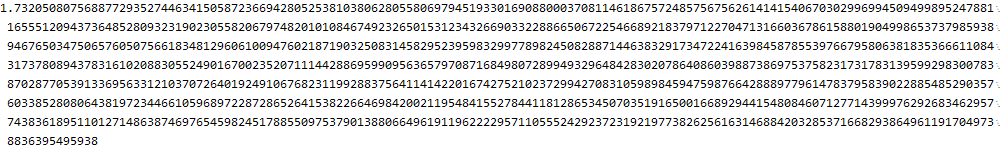
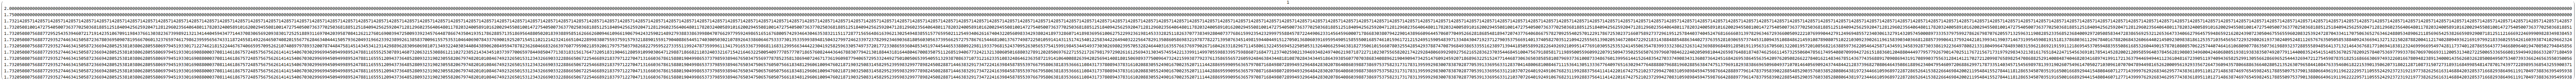

In [60]:
(* 函数不动点： *)
f[x_] := N[(x + 3/x)/2, 1000]
FixedPoint[f, 1]
FixedPointList[f, 1] // MatrixForm

条件迭代：

In [64]:
NestWhile[#^2 &, 2, (# < 10^10) &]
NestWhileList[#^2 &, 2, (# < 10^10) &]

f[x_] := N[(x + 3/x)/2, 20]
NestWhile[f, 1, Unequal, 2]
NestWhileList[Mod[3 #, 57] &, 1, Unequal, All]

18446744073709551616
{2, 4, 16, 256, 65536, 4294967296, 18446744073709551616}
1.7320508075688772935
{1, 3, 9, 27, 24, 15, 45, 21, 6, 18, 54, 48, 30, 33, 42, 12, 36, 51, 39, 3}

折叠运算：

In [ ]:
Fold[f, x, {a, b, c}]
FoldList[f, x, {a, b, c}]